# Loan Prediction Model

## Machine Learning ALP - Hagen Kwik & Dhammiko Dharmawan

## Setup

### Import Libraries

In [97]:
# library for mathematical functions and data preprocessing such as table, etc
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import skew

# Library for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# Library for machine learning functions/algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,  precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler


### Load Dataset

In [98]:
# data itself
url = 'lending_club_loan_two.csv'
# description of each column
url_info = 'lending_club_info.csv'
df_before = pd.read_csv(url)
df_info = pd.read_csv(url_info)
df_before.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [99]:
df_info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [100]:
df_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

## Exploratory Data Analysis & Data Preprocessing & Data Cleaning

### Remove Useless Columns

In [101]:
# Reason:
# These features lack direct relevance to a person's ability to secure a loan. 
# grade and subgrade, summarizes the loan status, can be substituted with existing data like interest rates and annual income

columns_to_drop = ['emp_title', 'address', 'issue_d', 'title', 'earliest_cr_line', 'initial_list_status', 'grade', 'sub_grade', 'purpose']
df_before = df_before.drop(columns=columns_to_drop)

In [102]:
df_before.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   emp_length            377729 non-null  object 
 5   home_ownership        396030 non-null  object 
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  object 
 8   loan_status           396030 non-null  object 
 9   dti                   396030 non-null  float64
 10  open_acc              396030 non-null  float64
 11  pub_rec               396030 non-null  float64
 12  revol_bal             396030 non-null  float64
 13  revol_util            395754 non-null  float64
 14  total_acc             396030 non-null  float64
 15  

### Check data values

In [103]:
df_before.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [104]:
# Check which column needs fixing
for column in df_before.columns:
    unique_values = df_before[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'loan_amnt':
[10000.  8000. 15600. ... 36275. 36475.   725.]

Unique values in 'term':
[' 36 months' ' 60 months']

Unique values in 'int_rate':
[11.44 11.99 10.49  6.49 17.27 13.33  5.32 11.14 10.99 16.29 13.11 14.64
  9.17 12.29  6.62  8.39 21.98  7.9   6.97  6.99 15.61 11.36 13.35 12.12
  9.99  8.19 18.75  6.03 14.99 16.78 13.67 13.98 16.99 19.91 17.86 21.49
 12.99 18.54  7.89 17.1  18.25 11.67  6.24  8.18 12.35 14.16 17.56 18.55
 22.15 10.39 15.99 16.07 24.99  9.67 19.19 21.   12.69 10.74  6.68 19.22
 11.49 16.55 19.97 24.7  13.49 18.24 16.49 25.78 25.83 18.64  7.51 13.99
 15.22 15.31  7.69 19.53 10.16  7.62  9.75 13.68 15.88 14.65  6.92 23.83
 10.75 18.49 20.31 17.57 27.31 19.99 22.99 12.59 10.37 14.33 13.53 22.45
 24.5  17.99  9.16 12.49 11.55 17.76 28.99 23.1  20.49 22.7  10.15  6.89
 19.52  8.9  14.3   9.49 25.99 24.08 13.05 14.98 16.59 11.26 25.89 14.48
 21.99 23.99  5.99 14.47 11.53  8.67  8.59 10.64 23.28 25.44  9.71 16.2
 19.24 24.11 15.8  15.96 14.49 18.99

### Label Encoding (LOAN STATUS GA HARUS DI ENCODE)

In [105]:
# label encoder and fit_transform is a function that changes/remap string into number based on alphabetical order
le = LabelEncoder() 
df_before['term'] = le.fit_transform(df_before['term'])
# 36 months = 0,  60 months = 1

df_before['emp_length'] = le.fit_transform(df_before['emp_length'])
# '1 year' = 0, '10+ years' = 1, '2 years' = 2, '3 years' = 3, '4 years' = 4, '5 years' = 5,   
# '6 years' = 6, '7 years' = 7, '8 years' = 8,  '9 years' = 9, '< 1 year' = 10

df_before['home_ownership'] = le.fit_transform(df_before['home_ownership'])
# 'ANY' = 0, 'MORTGAGE' = 1, 'NONE' = 2, 'OTHER' = 3, 'OWN' = 4, 'RENT' = 5

df_before['verification_status'] = le.fit_transform(df_before['verification_status'])
# 'Not Verified' = 0, 'Source Verified' = 1, 'Verified' = 2

df_before['loan_status'] = le.fit_transform(df_before['loan_status'])
# 'Charged Off' = 0, 'Fully Paid' = 1 

df_before['application_type'] = le.fit_transform(df_before['application_type'])
# 'DIRECT_PAY' = 0, 'INDIVIDUAL' = 1, 'JOINT' = 2

### Check Data for imputation

In [106]:
columns_to_check = ["pub_rec_bankruptcies", "revol_util", "mort_acc"]
df_graph = df_before.copy()

for column in columns_to_check:
    skewness = skew(df_graph[column].dropna())
    print(f"Skewness of {column}: {skewness}")

ordered_categories = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
df_graph['emp_length'] = pd.Categorical(df_graph['emp_length'], categories=ordered_categories, ordered=True)

Skewness of pub_rec_bankruptcies: 3.4234273840472755
Skewness of revol_util: -0.07177774827280235
Skewness of mort_acc: 1.6001257380122578


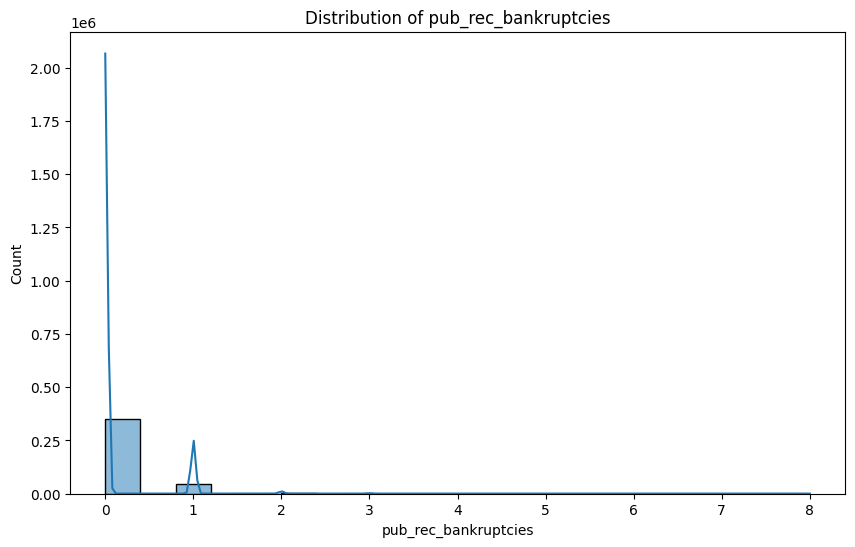

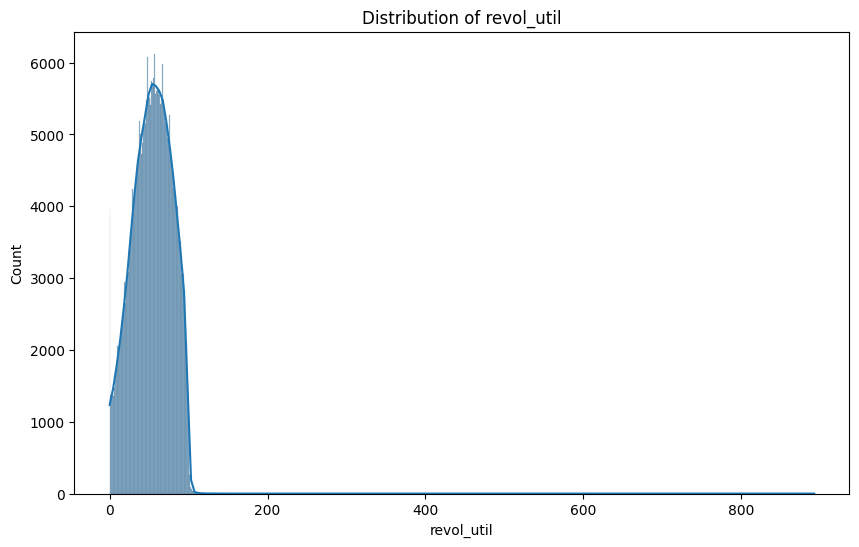

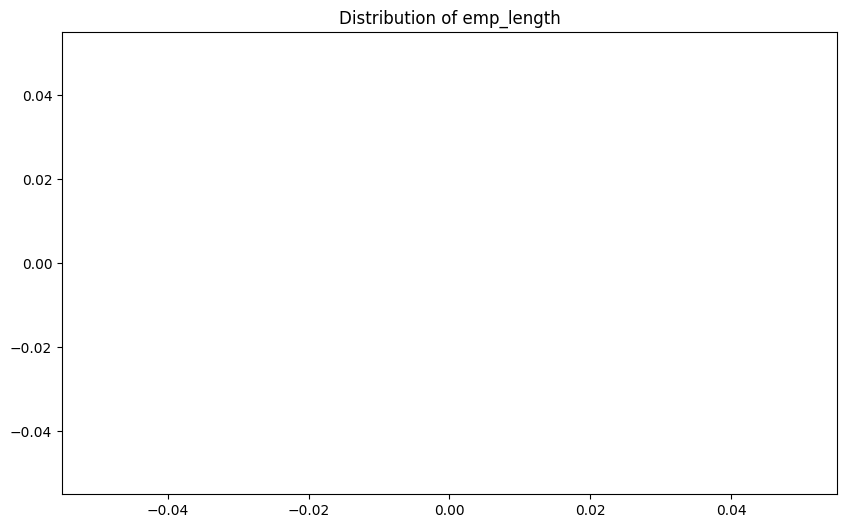

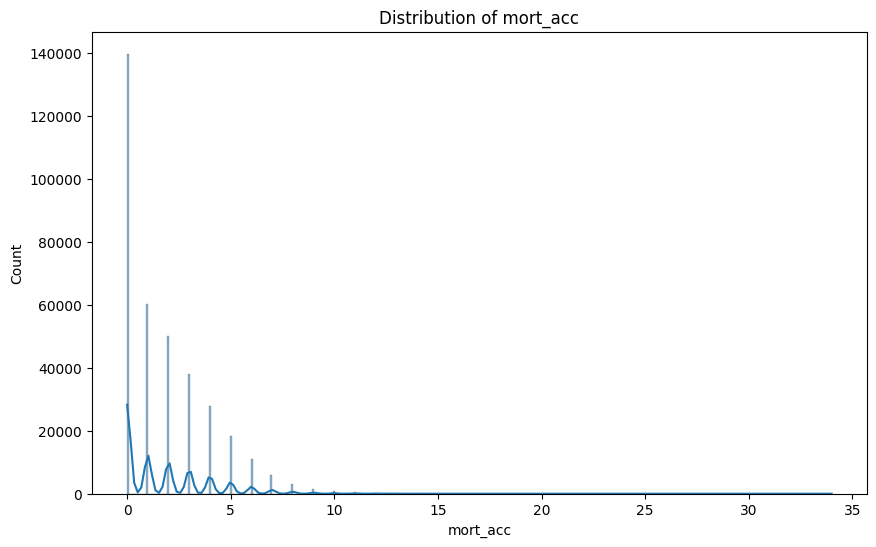

In [107]:
# Assuming your DataFrame is named df
columns_to_visualize = ['pub_rec_bankruptcies', 'revol_util', 'emp_length', 'mort_acc']
for column in columns_to_visualize:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_graph[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


### Fill Misssing Values / Imputation

numeric data uses either mean/median for imputation therefore we use them, however since they are skewed we use median as it is less prone to outliers except revol_util since it is normally distributed we can use mean


In [108]:
df_before['emp_length'].fillna(df_before['emp_length'].median(), inplace=True)
df_before['pub_rec_bankruptcies'].fillna(df_before['pub_rec_bankruptcies'].median(), inplace=True)
df_before['mort_acc'].fillna(df_before['mort_acc'].median(), inplace=True)
df_before['revol_util'].fillna(df_before['revol_util'].mean(), inplace=True)

In [109]:
df_before.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

### Visualise Data 

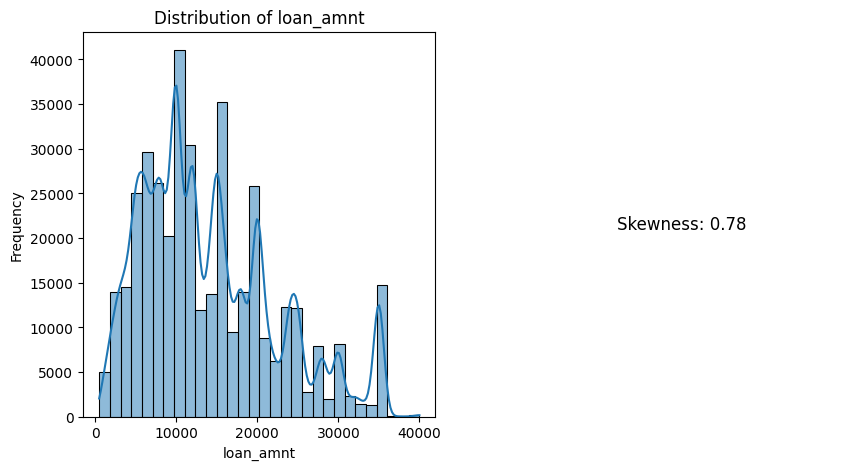

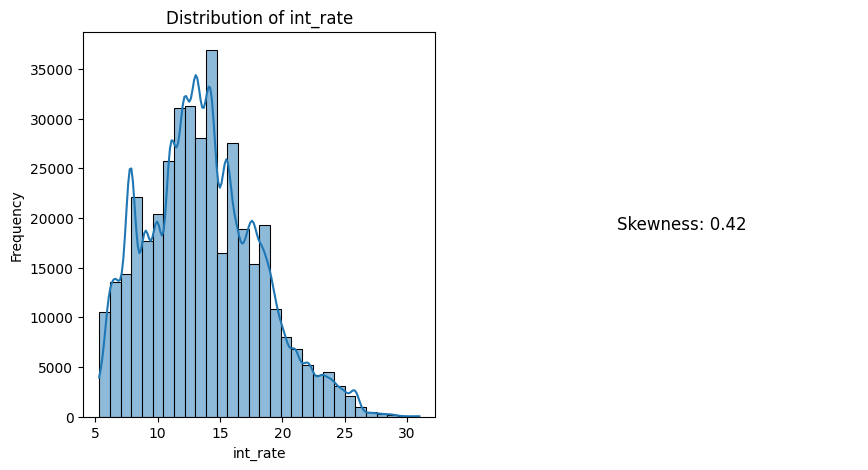

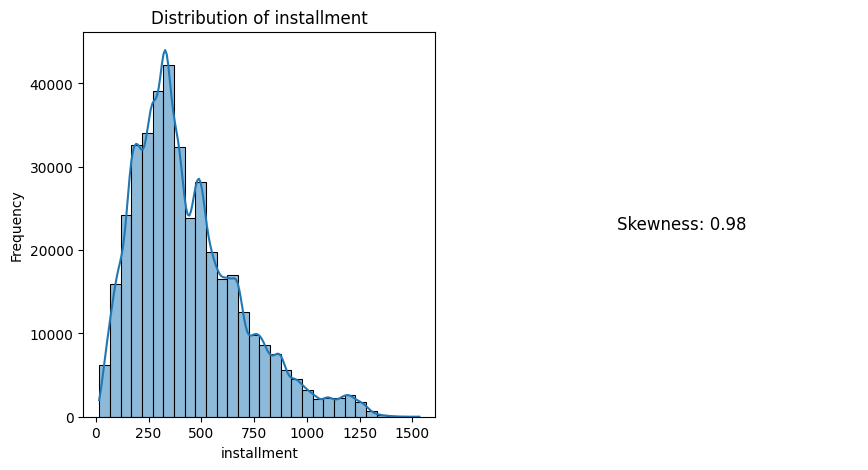

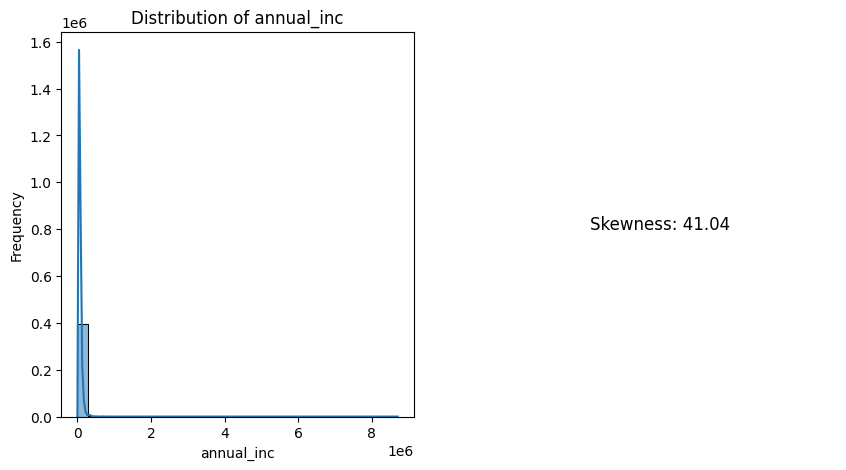

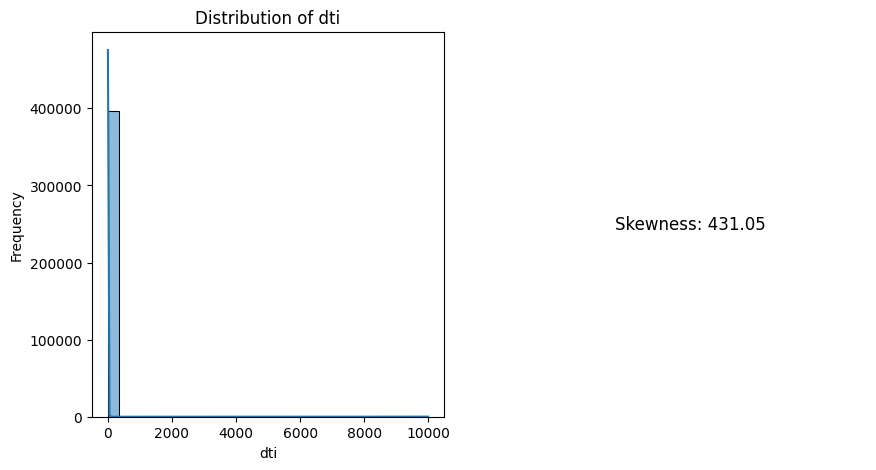

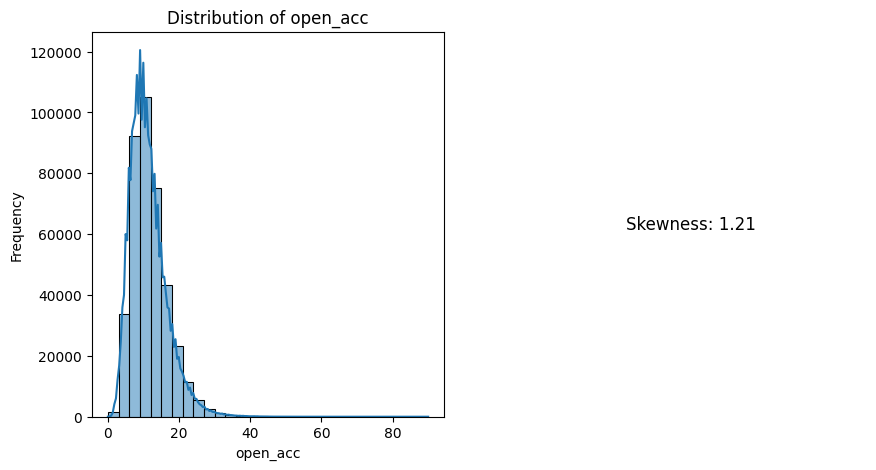

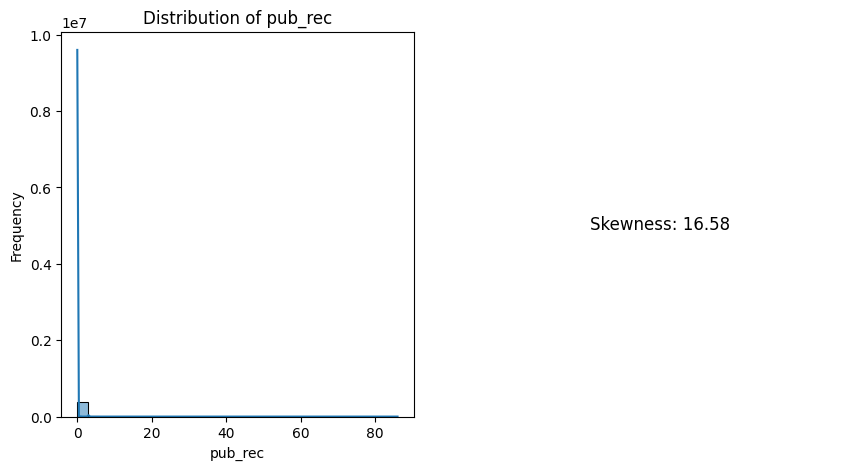

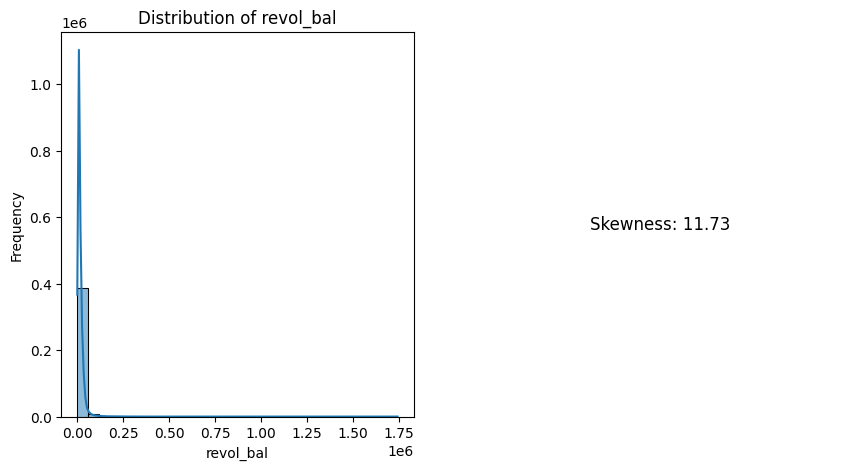

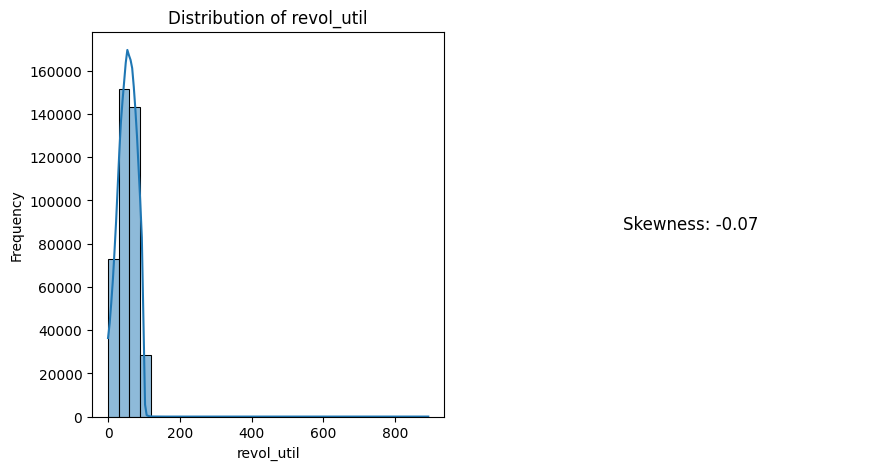

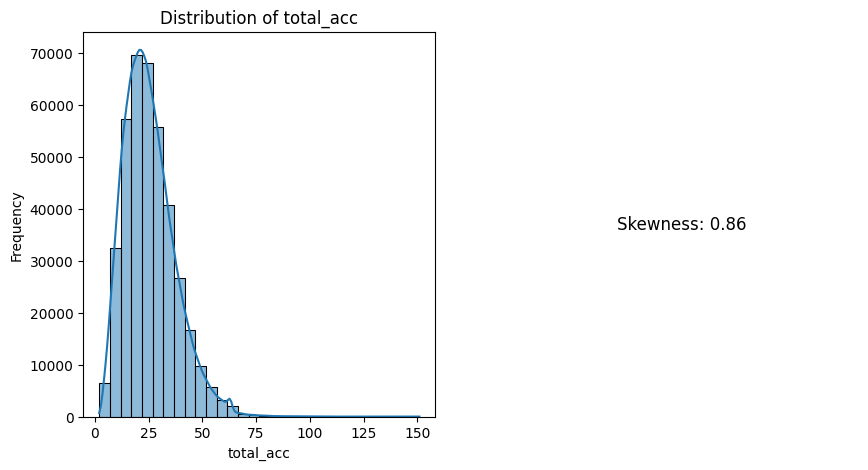

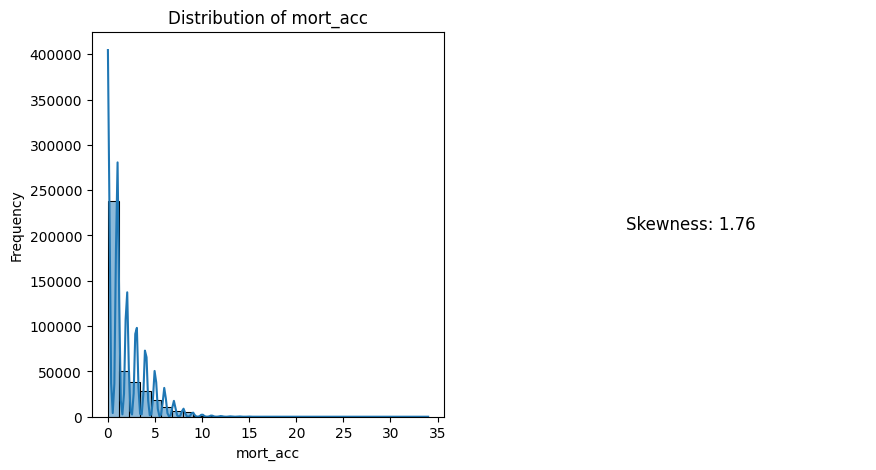

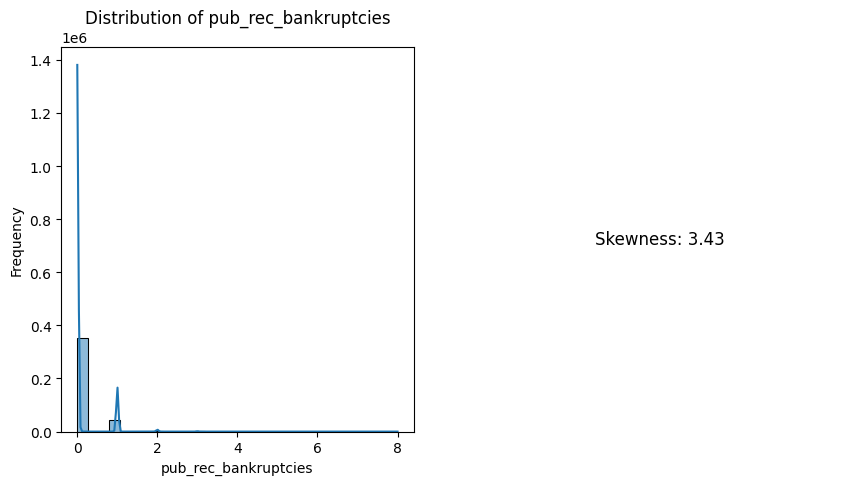

In [111]:
numeric_columns = df_before.select_dtypes(include=['float64']).columns

for col in numeric_columns:
    # Create a figure with two subplots: one for the histogram and one for the skewness information
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Histogram
    sns.histplot(df_before[col], bins=30, kde=True, ax=ax1)
    ax1.set_title(f'Distribution of {col}')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Frequency')

    # Skewness information
    skewness = skew(df_before[col])
    ax2.text(0.5, 0.5, f'Skewness: {skewness:.2f}', horizontalalignment='center',
             verticalalignment='center', transform=ax2.transAxes, fontsize=12)
    ax2.axis('off')  # Turn off the axis for skewness information

    plt.show()



### Outlier Treatment (Outlier doesnt affect accuracy much so i decided to treat it Research more later)

In [112]:
z_score_vars = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc']

no_outlier = df_before.copy()

# Store outlier counts and percentages for each column
outlier_info = {}

for col in z_score_vars:
    # since our dataset is skewed we use the 99 percentile formula to detect and delete outliers, only identifying extreme datas
    lower_limit = df_before[col].quantile(0.01)
    upper_limit = df_before[col].quantile(0.99)

    # Count outliers before clipping
    outlier_count = ((df_before[col] < lower_limit) | (df_before[col] > upper_limit)).sum()
    total_count = len(df_before[col])
    outlier_percentage = outlier_count / total_count * 100

    # Store outlier information for the column
    outlier_info[col] = {'count': outlier_count, 'percentage': outlier_percentage}

# Print outlier information for each column
print("Outlier information:")
for col, info in outlier_info.items():
    print(f"- {col}: {info['count']} outliers ({info['percentage']:.2f}%)")

# Drop rows with outliers
for col in z_score_vars:
    lower_limit = df_before[col].quantile(0.01)
    upper_limit = df_before[col].quantile(0.99)
    no_outlier = no_outlier[(no_outlier[col] >= lower_limit) & (no_outlier[col] <= upper_limit)]

Outlier information:
- loan_amnt: 4089 outliers (1.03%)
- int_rate: 7823 outliers (1.98%)
- installment: 7916 outliers (2.00%)
- annual_inc: 7237 outliers (1.83%)
- dti: 7905 outliers (2.00%)
- open_acc: 5372 outliers (1.36%)
- pub_rec: 2543 outliers (0.64%)
- revol_bal: 7918 outliers (2.00%)
- total_acc: 7553 outliers (1.91%)


### Check Dataset proportion

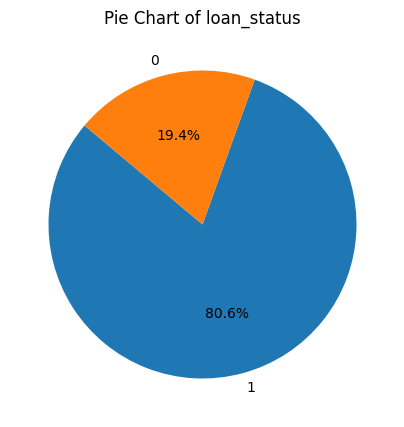

In [113]:
column_name = 'loan_status'

data_counts = no_outlier[column_name].value_counts()

# Plotting a pie chart
plt.figure(figsize=(5, 5))
plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of {column_name}')
plt.show()

## Random Forest Classification (Model Generation)

In [114]:
#  SPLIT
target_column = 'loan_status'
feature_columns = no_outlier.columns[no_outlier.columns != target_column]

X = no_outlier[feature_columns]
y = no_outlier[target_column]

In [115]:
# use the pareto priuncple 
# split 80 train 10 validate 10 test

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0)

X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

#### Over and Under sampling / Rebalance Training Dataset

In [116]:
# Undersample majority class by half
# rus = RandomUnderSampler(sampling_strategy=0.5, random_state=0)
# X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

#### Check dataset after rebalancing

In [118]:
data = y_train.value_counts()
print(data)

loan_status
1    225416
0     54117
Name: count, dtype: int64


In [71]:
data_counts = y_train_resampled.value_counts()
print(data_counts)

loan_status
0    108234
1    108234
Name: count, dtype: int64


#### Find best n estimators

In [120]:
# Create and train the Random Forest Classifier on subset1

# Hyper Paramaters:
# n estimator (value to be determined by using a for loop while checking  accuracy score)
# bootstrap value true (to validate test result by using selecting random data)
# criterion value gini (Computational Efficiency as we have a large dataset and is less sensitive to outliers)
# max depth value none(to use all variables as it is currently not overfitting)
# max features value all/auto (use all to diversify tree, create more robust)

# Create an empty dictionary to store n_estimator and corresponding accuracy scores
# n estimator is the number of trees in the forest
n_estimator_accuracy = {}

for i in range(50, 100):
    RFC = RandomForestClassifier(n_estimators = i, random_state=0, bootstrap=True, criterion="gini", max_depth=None)
    RFC.fit(X_train_resampled, y_train_resampled) 
    y_pred = RFC.predict(X_test)
    
    # Calculate accuracy and append it to the list
    accuracy = accuracy_score(y_test, y_pred)
    n_estimator_accuracy[i] = accuracy

# get the key/n estimator with the highest accuracy
best_n_estimator = max(n_estimator_accuracy, key=n_estimator_accuracy.get)
# get the value of the accuracy
best_accuracy_RFC = n_estimator_accuracy[best_n_estimator]

print(f"The best n_estimate value is {best_n_estimator} with an accuracy of {best_accuracy_RFC:.5f}")

The best n_estimate value is 69 with an accuracy of 0.80479


#### Use best n estimators

In [121]:
# Hyper Paramaters:
# n estimator (value to be determined by using a for loop while checking  accuracy score)
# bootstrap value true (to validate test result by using selecting random data)
# criterion value gini (Computational Efficiency as we have a large dataset and is less sensitive to outliers)
# max depth value none( to use all variables as it is currently not overfitting)
# max features value all/auto (use all to diversify tree, create more robust)

clf = RandomForestClassifier(n_estimators=69, bootstrap=True, criterion='gini', max_depth=None,  random_state=0)

# Train the classifier on the training set
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation set
y_pred_validation = clf.predict(X_validation)

# Evaluate the accuracy on the validation set
accuracy_validation = accuracy_score(y_validation, y_pred_validation)
print(f'Validation Accuracy: {accuracy_validation}')

# Make predictions on the test set
y_pred_test = clf.predict(X_test)

# Evaluate the accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {accuracy_test}')


Validation Accuracy: 0.7406273252818957
Test Accuracy: 0.741085226947513


## Evaluation

### Confusion Matrix

In [125]:
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix\n", cm)


Confusion Matrix
 [[ 2836  3944]
 [ 5103 23059]]


In [123]:
target_names = ['Charged Off', 'Fully Paid']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

 Charged Off       0.36      0.42      0.39      6780
  Fully Paid       0.85      0.82      0.84     28162

    accuracy                           0.74     34942
   macro avg       0.61      0.62      0.61     34942
weighted avg       0.76      0.74      0.75     34942



### F1 Score

In [80]:
TN, FP, FN, TP = cm.ravel()

# Calculate Accuracy
# (TP+TN)/total sample
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

# Calculate Precision
# TP/(TP+FP)
# Precision is a measure of the accuracy of positive predictions made by the model. It answers the question: "Of all the instances predicted as positive, how many were actually positive?"
precision = precision_score(y_test, y_pred_test)
print("Precision:", precision)

# Calculate Recall
# TP/(TP+FN)
# Recall measures the model's ability to identify all the positive instances correctly. It answers the question: "Of all the actual positive instances, how many were correctly predicted?"
recall = recall_score(y_test, y_pred_test)
print("Recall:", recall)

# Calculate Specificity
# TN/(TN+FN)
# specificity measures the model's ability to identify negative instances correctly. It answers the question: "Of all the actual negative instances, how many were correctly predicted?"
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Calculate F1 Score
# (2*Precision*Recall)/(Precision+Recall)
f1 = f1_score(y_test, y_pred_test)
print("F1 Score:", f1)

Accuracy: 0.7390819071604373
Precision: 0.8548537357928079
Recall: 0.8145728286343299
Specificity: 0.42551622418879054
F1 Score: 0.8342273214902631


#### THRESHOLD ??????

In [93]:
predicted_probabilities = clf.predict_proba(X_test)[:, 1]

# Adjust the threshold and make predictions
new_threshold = 0.4 # You can adjust this threshold value
y_pred_test_adjusted = (predicted_probabilities >= new_threshold).astype(int)

accuracy_test_adjusted = accuracy_score(y_test, y_pred_test_adjusted)
print(f'Test Accuracy (Adjusted Threshold): {accuracy_test_adjusted}')

precision_adjusted = precision_score(y_test, y_pred_test_adjusted)
print("Precision (Adjusted Threshold):", precision_adjusted)

# Calculate Recall with the adjusted threshold
recall_adjusted = recall_score(y_test, y_pred_test_adjusted)
print("Recall (Adjusted Threshold):", recall_adjusted)

# Calculate F1 Score with the adjusted threshold
f1_adjusted = f1_score(y_test, y_pred_test_adjusted)
print("F1 Score (Adjusted Threshold):", f1_adjusted)

Test Accuracy (Adjusted Threshold): 0.7901951805849694
Precision (Adjusted Threshold): 0.8300744731421328
Recall (Adjusted Threshold): 0.9300830906895817
F1 Score (Adjusted Threshold): 0.8772376375236531


In [94]:
cm2 = confusion_matrix(y_test, y_pred_test_adjusted)
print("Confusion Matrix\n", cm2)

target_names = ['Charged Off', 'Fully Paid']
print(classification_report(y_test, y_pred_test_adjusted, target_names=target_names))

Confusion Matrix
 [[ 1418  5362]
 [ 1969 26193]]
              precision    recall  f1-score   support

 Charged Off       0.42      0.21      0.28      6780
  Fully Paid       0.83      0.93      0.88     28162

    accuracy                           0.79     34942
   macro avg       0.62      0.57      0.58     34942
weighted avg       0.75      0.79      0.76     34942



Confusion Matrix
 [[ 2885  3895]
 [ 5222 22940]]

### AUC Score (BELUM SELESAI)

##### JESALIN APA ITU DAN HASIL?

To validate the robustness of our model, we utilize the roc_auc_score function from sk-learn where it automatically calculates the AUC score. A higher AUC signifies better discrimination ability, reinforcing the findings from the confusion matrix and F1 score. The AUC serves as a confirmation metric, providing a holistic view of the model's performance across different threshold values.

AUC Score: 0.6943759022545286


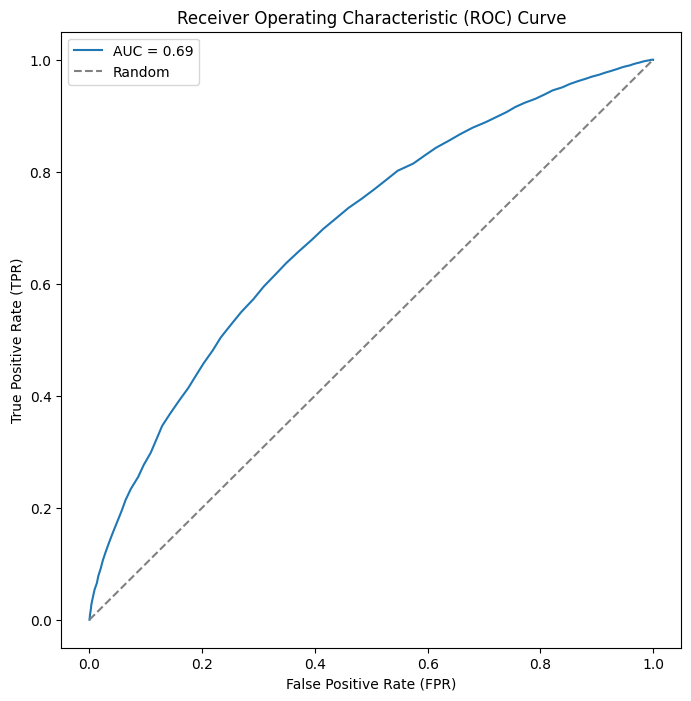

In [104]:
# Assuming you have the predicted probabilities for the positive class
y_prob_test = clf.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_prob_test)
print("AUC Score:", auc_score)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_test)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

# is 69 auc score good what does it mean, what can i do to increase it?

## Conclusion???

# I THINK THERE IS INHERIT BIAS IN MY DATASET CONSIDERTING ALL METHOD DOES NOT HELP THE IMBALANCE

# feature importance (tried many differnet columns), outliers, scaling ga pengaruh

# Cara over n undersampling lumayan pengaruh, adasyn method jelek, over sampling only higher accuracy than over and under SMOTE AND RANDOM GA NGEFEK

# COST SENSITIVE WEIGHT DOES NOT HELP, lowers accuracy, increase tn, fp, reduce fn, tp

# PCA BAD transformation ttp tn lebih dikit dri fn fp, other transformation juga ga bisa naikin

# SVM 3 jam ga selesai jadi ga mungkin, NN accuracy ga beda,pake model lain apa lagi yg bisa? 

In [98]:
# Confusion Matrix BOTH OVER AND UNDER
#  [[ 2885  3895]
#  [ 5222 22940]]
#              precision    recall  f1-score   support

#  Charged Off       0.36      0.43      0.39      6780
#   Fully Paid       0.85      0.81      0.83     28162

#     accuracy                           0.74     34942
#    macro avg       0.61      0.62      0.61     34942
# weighted avg       0.76      0.74      0.75     34942

# Accuracy: 0.7390819071604373
# Precision: 0.8548537357928079
# Recall: 0.8145728286343299
# Specificity: 0.42551622418879054
# F1 Score: 0.8342273214902631

# -----------------------------------------------------------

# Confusion Matrix OVERSAMPLING ONLY
#  [[ 1150  5630]
#  [ 1443 26719]]
#               precision    recall  f1-score   support
#  Charged Off       0.44      0.17      0.25      6780
#   Fully Paid       0.83      0.95      0.88     28162
#     accuracy                           0.80     34942
#    macro avg       0.63      0.56      0.56     34942
# weighted avg       0.75      0.80      0.76     34942

# Accuracy: 0.7975788449430484
# Precision: 0.8259606170206188
# Recall: 0.9487607414246148
# Specificity: 0.1696165191740413
# F1 Score: 0.8831121614251956

# Determining the better confusion matrix for loan approval depends on your priorities and the costs associated with different types of errors.

# Here's a breakdown of key metrics and considerations for each matrix:

# Matrix PT:

# Accuracy: 74%
# Precision (Charged Off): 35%
# Recall (Charged Off): 38%
# F1-score (Charged Off): 36%
# Strengths: Better at identifying charged-off loans (higher recall), potentially reducing losses from defaults.
# Weaknesses: Lower overall accuracy and precision, potentially leading to missed opportunities for good loans.
# Matrix ALP:

# Accuracy: 80%
# Precision (Charged Off): 44%
# Recall (Charged Off): 17%
# F1-score (Charged Off): 25%
# Strengths: Higher overall accuracy, approves more loans, and potentially increases profits.
# Weaknesses: Misses more charged-off loans (lower recall), potentially increasing losses from defaults.
# Considerations:

# Cost of False Negatives (Charged Off): If approving a charged-off loan is very costly, prioritize recall and lean towards PT.
# Cost of False Positives (Fully Paid): If denying a fully paid loan incurs significant opportunity costs, prioritize precision and lean towards ALP.
# Risk Tolerance: If risk tolerance is low, ALP might be preferred due to higher overall accuracy.
# Business Objectives: Balance profit goals with credit risk management.
# Additional Insights:

# F1-score: Consider this as a balanced measure of precision and recall, especially for the "Charged Off" class.
# Cost-Sensitive Analysis: Assign specific costs to each type of error to make a more informed decision.
# Explore Alternative Models: Investigate other models that might achieve a better balance between accuracy, precision, and recall for your specific needs.
# Ultimately, the best choice depends on your specific business context and risk tolerance.